In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def flip_coin(prob=0.5):
    """Simulate a single coin flip.
    default a fair coin."""
    return 1 if random.random() < prob else 0

def flip_coins(coins, prob=0.5):
    """Simulate a series of coin flips.
    default a fair coin."""
    return [flip_coin(prob) for _ in range(coins)]

In [3]:
flip_coins(10)

[0, 1, 1, 0, 1, 0, 0, 1, 1, 1]

In [4]:
num_coins = 10
num_trials = 3

# Simulate flipping num_coins coins num_trials times.
# Each row is a trial.
# Each column is a coin.
flips = np.array([flip_coins(num_coins) for _ in range(num_trials)])
print(flips)

[[0 0 0 1 1 0 1 0 0 1]
 [1 1 0 1 1 0 0 0 1 0]
 [1 0 1 0 1 0 0 0 1 1]]


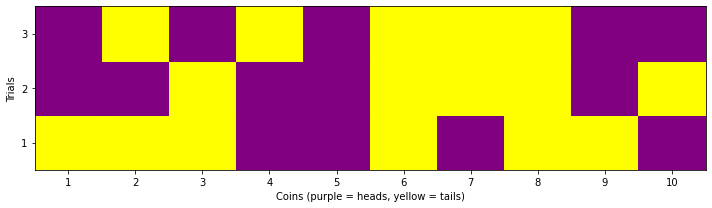

In [5]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, num_trials))

# Iterate over trials and coins
for trial in range(num_trials):
    for coin in range(num_coins):
        # Get the result of the coin flip
        flip = flips[trial, coin]
        
        # Determine the color based on the result
        color = 'purple' if flip == 1 else 'yellow'
        
        # Add a patch to the plot
        ax.add_patch(plt.Rectangle((coin, trial), 1, 1, color=color))

# Set axis limits and labels
ax.set_xlim(0, num_coins)
ax.set_ylim(0, num_trials)
ax.set_yticks(np.arange(num_trials) + 0.5, np.arange(num_trials) + 1)
ax.set_xticks(np.arange(num_coins) + 0.5, np.arange(num_coins) + 1)
ax.set_ylabel('Trials')
ax.set_xlabel('Coins (purple = heads, yellow = tails)')

# Show the plot
plt.tight_layout()

In [6]:
def simulate_trials(trials, coins):
    # Simulate flipping coins for each trial
    heads = [flip_coins(coins).count(1) for _ in range(trials)]
    return heads

def plot_histogram(heads, trials, index, coins):
    # Plot histogram
    sns.histplot(heads, 
                 bins=np.arange(coins+2)-0.5, 
                 kde=False, stat="density", 
                 label=f'{trials} Trials', 
                 element="step", 
                 color=sns.color_palette()[index - 1],
                 alpha=0.7)
    plt.xlabel('Number of Heads')
    plt.ylabel('Frequency')
    plt.legend()

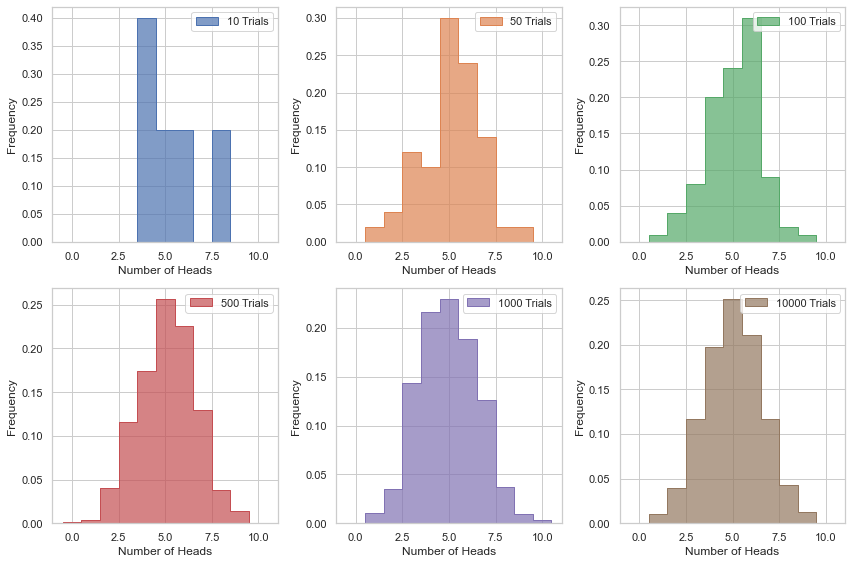

In [7]:
# Set the number of trials and flips
trial_sets = [10, 50, 100, 500, 1000, 10000]
coins = 10 

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Set the seaborn style
sns.set(style="whitegrid")

for trials in trial_sets:
    
    index = trial_sets.index(trials)+1 # Set the subplot index
    n = len(trial_sets) # Set the number of subplots
    rows = int(np.ceil(n/2)) # Set the number of rows
    
    plt.subplot(2, rows, index)
    
    heads = simulate_trials(trials, coins)
    plot_histogram(heads, trials, index, coins)

plt.tight_layout()

In [8]:
def calculate_probabilities(trials, coins):
    # Simulate flipping coins for each trial
    heads = [flip_coins(coins).count(1) for _ in range(trials)]
    
    # Calculate empirical probabilities
    values, counts = np.unique(heads, return_counts=True)
    probabilities = counts / trials
    
    return values, probabilities

def plot_probabilities(ax, values, probabilities, trials, index):
    # Define marker types
    markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
    
    # Plot empirical probabilities
    ax.scatter(values, probabilities, 
               label=f'{trials} Trials', 
               color=sns.color_palette()[index - 1],
               marker=markers[index % len(markers)], # Use different marker for each set of trials
               s=100) # Set marker size

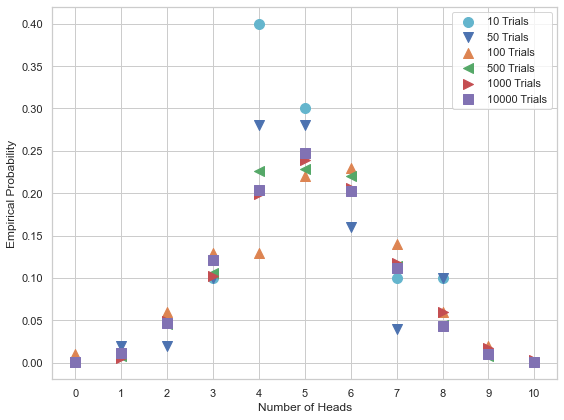

In [9]:
plt.figure(figsize=(8, 6))

# Set the seaborn style
sns.set(style="whitegrid")

# Create a single subplot
ax = plt.subplot(1, 1, 1)

for trials in trial_sets:
    
    index = trial_sets.index(trials) # Set the subplot index
    
    values, probabilities = calculate_probabilities(trials, coins)
    plot_probabilities(ax, values, probabilities, trials, index)

# Set x-ticks to be centered on the markers
ax.set_xticks(np.arange(0, coins+1))

plt.xlabel('Number of Heads')
plt.ylabel('Empirical Probability')
plt.legend()

plt.tight_layout()